# Logistic Regression

## 1. Intro

We will be working with a fake advertising dataset to predict whether or not a particular internet user clicked on an advertisement. The objective is to create a logistic regression model that predicts the likelihood of a user clicking on an ad based on various features related to their behavior and demographic information.

The dataset contains several features that describe user activity, demographic details, and ad interactions. Our goal is to build a classification model that can accurately predict whether a user will click on an ad (Clicked on Ad) or not, based on these features. This type of binary classification problem is well-suited for logistic regression, a model specifically designed to handle yes/no outcomes.

The dataset includes the following features:

- Daily Time Spent on Site: The total number of minutes a user spends on the website daily.
- Age: The age of the user in years.
- Area Income: The average income in the geographical area where the user resides.
- Daily Internet Usage: The average number of minutes a user spends on the internet daily.
- Ad Topic Line: The headline of the advertisement shown to the user.
- City: The city where the user is located.
- Male: A binary indicator of whether the user is male or not (1 = Male, 0 = Female).
- Country: The country where the user resides.
- Timestamp: The exact time when the user clicked on the ad or closed the window.
- Clicked on Ad: The target variable indicating whether the user clicked on the ad (1 = Yes, 0 = No).

The primary objective of this project is to:

- Develop a logistic regression model that can predict the likelihood of a user clicking on an ad based on the features provided.
- Evaluate the model’s performance using various classification metrics such as accuracy, precision, recall, and F1-score.

## Data load

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline

In [146]:
ad_data = pd.read_csv('advertising.csv')

In [18]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [20]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


#### Observations:

- RangeIndex (1000 entries, 0 to 999): The dataset contains 1,000 rows, each representing a record or observation, indexed from 0 to 999.
- Data columns (10 total): There are 10 columns in the dataset, representing different features of the users.
- Non-null Count: All 10 columns have 1,000 non-null entries, meaning there are no missing values in the dataset.

Data Types:
- float64 (3 columns): Numeric columns representing continuous values like Daily Time Spent on Site, Area Income, and Daily Internet Usage.
- int64 (3 columns): Integer columns, such as Age, Male (binary indicator), and the target variable Clicked on Ad.
- object (4 columns): Categorical or textual data, including Ad Topic Line, City, Country, and Timestamp.

In [26]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


#### Observations:

- Daily Time Spent on Site:
Users spend between 32.6 and 91.43 minutes on the site.
The average time spent is about 65 minutes, with a standard deviation of 15.85 minutes, indicating some variability in how long users stay on the site.

- Age:
The users' ages range from 19 to 61 years, with a mean age of 36 years. The standard deviation is 8.78 years, indicating a moderate spread in the users' ages.

- Area Income:
The average income for users' geographical areas is around 55,000, with a wide range from about 13,996 to 79,485. This large standard deviation (13,414) indicates that users come from areas with diverse income levels.

- Daily Internet Usage:
Users spend an average of 180 minutes on the internet daily, with a range from 104.78 minutes to 269.96 minutes. The standard deviation (43.90) suggests significant differences in daily internet usage.

- Male:
The binary column "Male" (0 for Female, 1 for Male) shows an approximately equal split of genders, with a mean value of 0.481 and a standard deviation of 0.499. The 50th percentile (median) shows that 50% of the users are male.

- Clicked on Ad (Target Variable):
This column shows whether a user clicked on the advertisement or not, with 50% of users clicking on the ad. This even split between clicks and non-clicks will allow for balanced model training.

## Exploratory Data Analysis

### Distribution of Target Variable: Clicked on Ad

The countplot below shows the distribution of the target variable **Clicked on Ad**, which indicates whether a user clicked on an advertisement (1) or not (0).

- **X-axis**: The target variable, where:
  - `0` represents users who did not click on the advertisement.
  - `1` represents users who clicked on the advertisement.
- **Y-axis**: The count of users in each category.

### Key Insights:
- The target variable is **balanced**, with roughly equal numbers of users who clicked on the ad (1) and those who did not (0).
- This balance is ideal for training a classification model, as it ensures the model will not be biased toward one class over the other.

The balanced nature of the target variable makes the dataset well-suited for binary classification, and this visualization gives a quick overview of the proportions in each category.

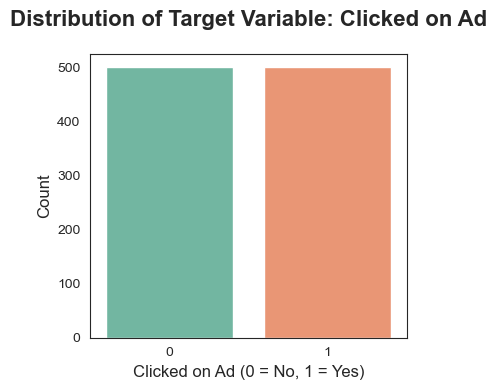

In [127]:
plt.figure(figsize=(4,4))
sns.countplot(x='Clicked on Ad', data=ad_data,hue='Clicked on Ad', palette='Set2', legend=False)
plt.title('Distribution of Target Variable: Clicked on Ad', fontsize=16, weight='bold', pad=20)
plt.xlabel('Clicked on Ad (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.tight_layout()
plt.show()

### Age Distribution of Users

The histogram below shows the distribution of the users' ages from the dataset. The x-axis represents the **Age** of the users, and the y-axis represents the frequency of users within each age range.

- The dataset includes users ranging in age from 19 to 61 years.
- The most common age group appears to be around the mid-30s, as indicated by the peak in the histogram.
- The distribution is relatively spread out, with users across a wide range of ages, though there is a concentration of users in the age range of 30-40 years.

This visualization helps us understand the demographic profile of the users, which may play a role in whether or not they click on the advertisement.

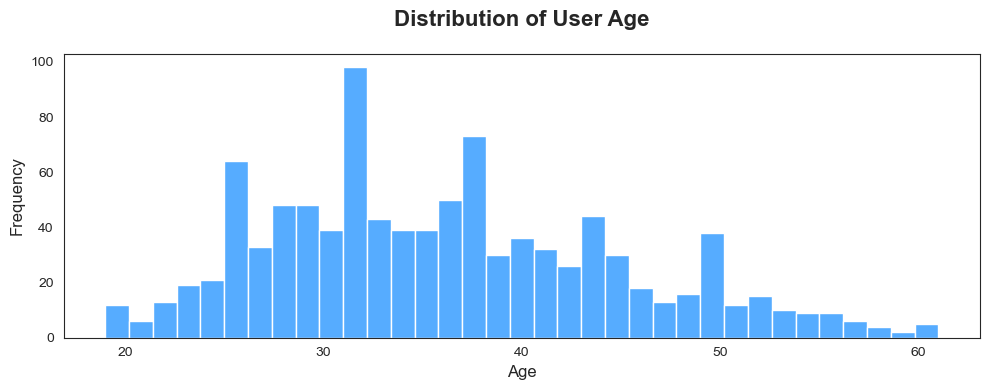

In [43]:
sns.set_style("white")
plt.figure(figsize=(10,4))

sns.histplot(x=ad_data['Age'], bins=35, kde=False, color='dodgerblue')
plt.title('Distribution of User Age', fontsize=16, weight='bold', pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

**Create a jointplot showing Area Income versus Age.**

### Relationship Between Age and Area Income of Users

The plot below is a **jointplot** that visualizes the relationship between **Age** and **Area Income** of users in the dataset. The x-axis represents the users' age, while the y-axis represents the average income in the users' geographical area.

- The **scatter plot** in the center shows individual data points, where each point corresponds to a user. This allows us to visualize the relationship between the two variables.
- The **marginal histograms** on the top and right show the distributions of **Age** and **Area Income** individually, with a smooth Kernel Density Estimate (KDE) overlaid.

From this visualization, we can observe that:
  - Users are spread across a wide range of ages, with a concentration around 30-40 years.
  - Most users come from areas with income between 50,000 and 70,000.
  - There does not appear to be a strong linear relationship between Age and Area Income.

This plot helps us explore how demographic factors like age and income may correlate, which could play a role in whether or not a user clicks on an advertisement.


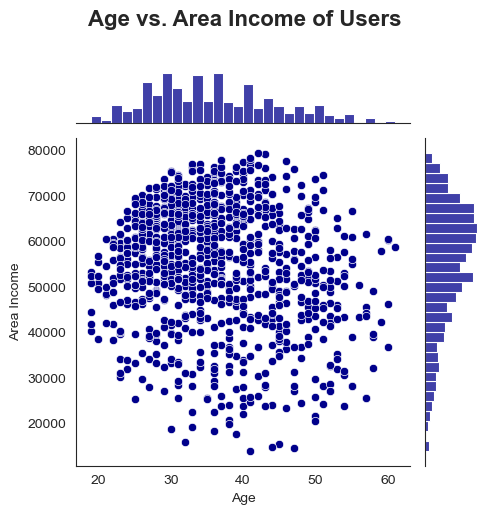

In [62]:
sns.set_style("white")
sns.jointplot(x='Age', y='Area Income', data=ad_data, kind='scatter', color='darkblue', height=5, marginal_kws={'bins': 30, 'fill': True})
plt.suptitle('Age vs. Area Income of Users', fontsize=16, weight='bold', y=1.02)

plt.tight_layout()
plt.show()

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

### Relationship Between Age and Daily Time Spent on Site (KDE)

The plot above shows a **Kernel Density Estimate (KDE)** joint plot of the relationship between **Age** and **Daily Time Spent on Site** for users in the dataset. The KDE plot provides a smooth estimate of the data distribution in both dimensions.

Key Observations:
- The density is higher for users aged between 30 and 40 years who spend around 60-80 minutes per day on the site.
- Users outside this age range tend to spend either more or less time on the site, but there are fewer users in those areas, as shown by the lighter contour lines.

This KDE joint plot provides insights into how user engagement (measured by time spent on the site) may vary with age, which could be useful for understanding user behavior in relation to advertisements.

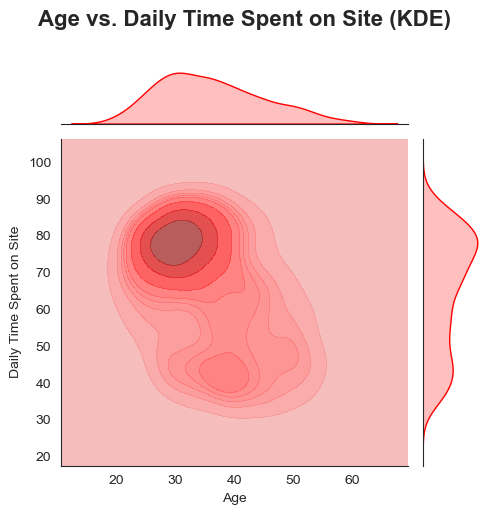

In [72]:
sns.set_style("white")
sns.jointplot(data=ad_data, x='Age', y='Daily Time Spent on Site',
              kind='kde', color='red', fill=True, thresh=0, alpha=.8, height=5)
plt.suptitle('Age vs. Daily Time Spent on Site (KDE)', fontsize=16, weight='bold', y=1.02)

plt.tight_layout()
plt.show()

### Relationship Between Daily Time Spent on Site and Daily Internet Usage

The scatterplot below shows the relationship between **Daily Time Spent on Site** and **Daily Internet Usage** for users in the dataset.

Key Observations:
- There is a noticeable positive trend where users who spend more time on the internet daily also tend to spend more time on the site.
- The scatterplot shows a relatively consistent pattern, indicating that internet users (those with higher daily internet usage) may also engage more with the site.

This plot provides insights into user behavior, showing how general internet activity correlates with specific engagement on the site. This could be useful for identifying high-engagement users for targeted advertising.

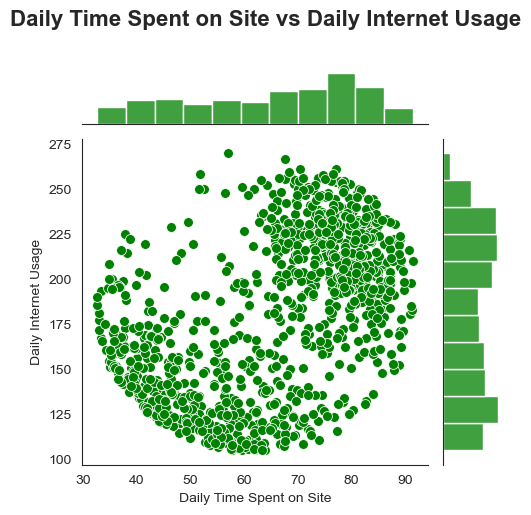

In [76]:
sns.jointplot(data=ad_data,
              x='Daily Time Spent on Site',
              y='Daily Internet Usage',
              color='green',
              height=5,
              joint_kws={'s': 50})
plt.suptitle('Daily Time Spent on Site vs Daily Internet Usage', fontsize=16, weight='bold', y=1.02)


plt.tight_layout()
plt.show()

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

### Pairplot of Features by Clicked on Ad

The pairplot below shows the relationships between several features in the dataset, with a color-coded distinction based on whether a user clicked on the advertisement (`Clicked on Ad`).

**Hue ('Clicked on Ad')**: The points are colored based on whether the user clicked on the ad (1) or not (0). This helps in visualizing the differences between the two classes.

**Diagonal Plots (KDE)**: The diagonal plots show the distributions of each individual feature (e.g., Age, Daily Internet Usage) for both classes using Kernel Density Estimation (KDE). This gives us insight into how each feature varies between users who clicked on the ad and those who didn’t.

Key Observations:

- The distribution of features such as **Age**, **Daily Time Spent on Site**, and **Daily Internet Usage** seem to differ between users who clicked on the ad and those who didn’t.
- There are clear separations in some scatterplots, suggesting that certain features (e.g., Age, Daily Time Spent on Site) could be strong indicators of whether a user clicks on an ad.

This pairplot allows for a quick exploration of the relationships between features and how they correlate with the target variable (Clicked on Ad). It is especially useful for identifying which features may be important for further analysis or modeling.


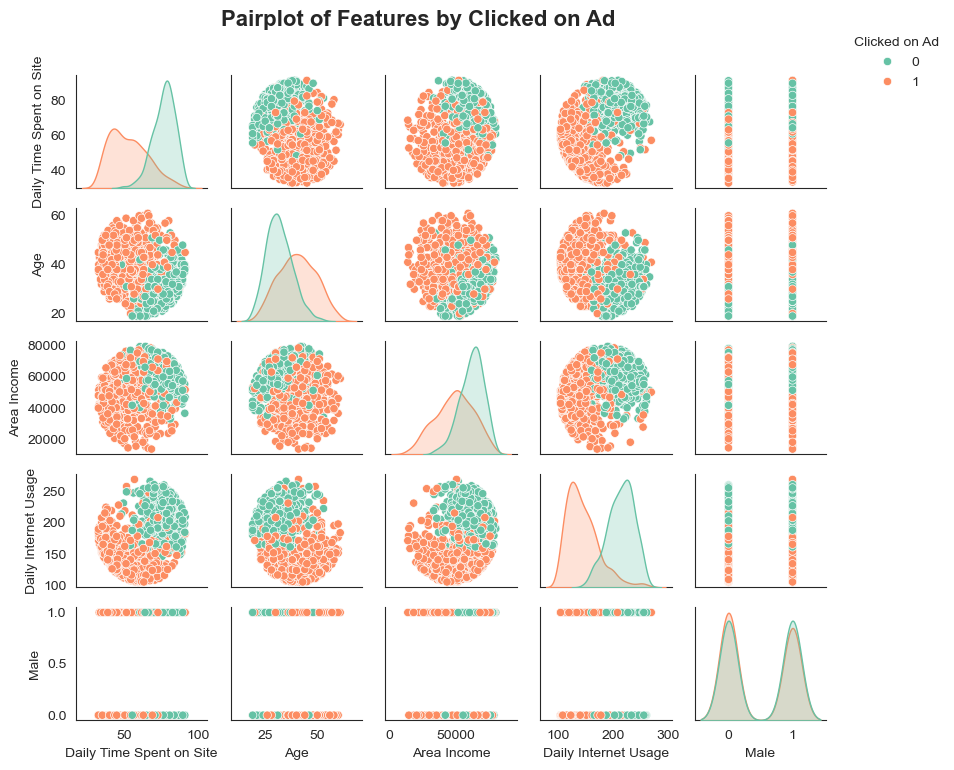

In [97]:
ax = sns.pairplot(ad_data, hue='Clicked on Ad', palette='Set2', diag_kind='kde', height=1.5)
plt.suptitle('Pairplot of Features by Clicked on Ad', fontsize=16, weight='bold', y=1.02)

sns.move_legend(ax,loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### Correlation Heatmap of Features

The heatmap above visualizes the **correlation matrix** of the numerical features in the dataset, showing the pairwise relationships between them. The color scale (ranging from blue to red) indicates the strength and direction of the correlations:

Key Insights:
- **Strong positive correlations**:
  - There is a strong positive correlation between **Daily Time Spent on Site** and **Daily Internet Usage**. This suggests that users who spend more time on the internet also tend to spend more time on the site.
  
- **Moderate correlations**:
  - **Age** and **Clicked on Ad** show a moderate negative correlation, suggesting that older users are less likely to click on ads.
  - **Daily Time Spent on Site** is negatively correlated with **Clicked on Ad**, meaning users who spend more time on the site are less likely to click on ads.
  
- **Weak or no correlations**: Some features, like **Area Income** and **Clicked on Ad**, show weak correlations, indicating little to no relationship.

The heatmap helps us identify potential relationships between features and the target variable, allowing us to focus on the most impactful features when building predictive models.


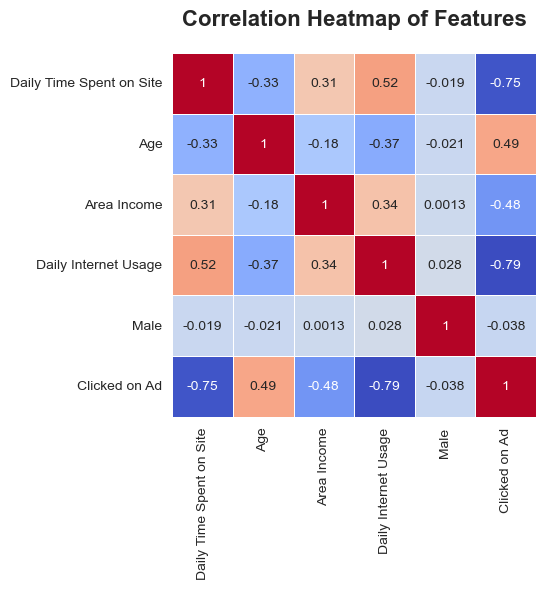

In [107]:
plt.figure(figsize=(6,6))

sns.heatmap(ad_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', square=True, cbar=False)
plt.title('Correlation Heatmap of Features', fontsize=16, weight='bold', pad=20)


plt.tight_layout()
plt.show()

## Data Preprocessing

### Handling Missing Values

In this step, we address any potential missing values in the dataset

In [138]:
print(ad_data.isnull().sum())

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


### Observation:

No missing values

### Encoding

If your dataset contains non-numeric features (e.g., categorical data), you need to convert these into numerical values before training the logistic regression model.

- One-hot encoding:
    * Creates binary columns for each category in a categorical feature.
    * Useful when there is no inherent order between categories (e.g., country names, city names).

In this step, we determine the categorical features in the dataset and create a preprocessor to us it for converting categorical features into numerical representations using **OneHotEncoder**.

 - The `handle_unknown='ignore'` parameter ensures that if new categories appear in the test data that were not seen in the training data, the encoder will ignore them rather than raise an error.
 - `sparse_output=False` ensures that the output is a dense array, not a sparse matrix, which is more convenient for further processing.
 - `remainder='passthrough'` keeps all other numerical columns in the dataset unchanged

In [226]:
categorical_features = ['Ad Topic Line','Country','City']

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

enc = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', enc, categorical_features)],
    remainder='passthrough'  # Leaves the remaining columns as it is
)

### Data Scaling

The algorithm doesn't require features to be scaled to work, scaling the data is important for several reasons:
- Convergence Speed:

Logistic regression uses gradient descent optimization to find the best parameters (weights) that minimize the loss function. If the features are on different scales, the optimization process can be slow and inefficient because the gradient descent algorithm may take longer to converge.

- Coefficient Interpretation:

In logistic regression, the model assigns a weight (coefficient) to each feature. If features are on very different scales, it can lead to disproportionate weights and make interpretation of the coefficients more difficult.

- Improved Model Performance:

Unscaled data can result in poorly fitted models, especially when using regularization techniques like Lasso or Ridge regression, which penalize large coefficients. Scaling ensures that all features are treated equally by the model.

!!! Scale only numerical features


In this step, we change our preprocessor by adding a `StandardScaler` to the numerical features to standardize them, ensuring that they all have a mean of 0 and a standard deviation of 1.

In [264]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income',	'Daily Internet Usage']

scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', enc, categorical_features),
        ('num',scaler, numerical_features)],
    remainder='passthrough'  # Leaves the remaining columns as it is
)

## Splitting the Data and Model Training


We split the dataset into training and testing sets, remove unnecessary columns, and apply the **OneHotEncoder** to categorical features.

 - The `Timestamp` column, which represents the time the user clicked on or ignored the ad, is removed because it does not provide useful information for our logistic regression model.
 - We extract the target variable `Click on Ad` and store it in y, leaving the feature set in X.
 - Apply the `OneHotEncoder` (within the `preprocessor`) to convert categorical columns into numerical values (!!! fit and transform for Train and only transform for Test)

In [266]:
X = ad_data.drop('Timestamp',axis=1).copy()
y = X.pop('Clicked on Ad')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

X_test_prep = pd.DataFrame(X_test_prep,columns=preprocessor.get_feature_names_out())
X_train_prep = pd.DataFrame(X_train_prep,columns=preprocessor.get_feature_names_out())

In [271]:
log_model = LogisticRegression()
log_model.fit(X_train_prep, y_train)

LogisticRegression()

## Model Predictions and Evaluation

In [279]:
predictions = log_model.predict(X_test_prep)

### Confusion Matrix for Logistic Regression Model

A **confusion matrix** is a useful tool for evaluating the performance of a classification model by summarizing the number of correct and incorrect predictions. It provides insight into how well the model distinguishes between the classes.

The confusion matrix shows the following:

- **True Positives (TP)**: The number of positive cases that were correctly predicted by the model.
- **True Negatives (TN)**: The number of negative cases that were correctly predicted.
- **False Positives (FP)**: The number of negative cases incorrectly predicted as positive (also known as Type I error).
- **False Negatives (FN)**: The number of positive cases incorrectly predicted as negative (also known as Type II error).

This confusion matrix reflects a well-performing model that makes very few errors, with only a small number of false positives and false negatives.

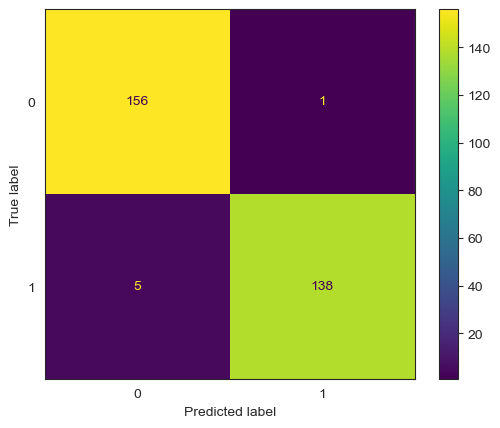

In [300]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(conf_matrix, display_labels=None).plot()

### Explanation of Metrics:
- Accuracy: The proportion of correctly predicted instances (both positives and negatives) out of all instances.
 
- Precision: The proportion of true positive predictions out of all instances predicted as positive. This metric is particularly important when false positives have a high cost.
 
- Recall: The proportion of actual positive instances that were correctly predicted. This metric is important when missing positive instances (false negatives) is costly.
 
- F1-Score: The harmonic mean of precision and recall, balancing both metrics. It is useful when you need a balance between precision and recall.
 
Detailed Classification Report:

The classification report provides a more detailed summary of precision, recall, and F1-score for each class (both positive and negative). It includes:

- Support: The number of true instances for each class in the dataset.

In [302]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print('=====================================================')
print(classification_report(y_test,predictions))

Accuracy: 0.9800
Precision: 0.9928
Recall: 0.9650
F1-Score: 0.9787
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



### Observations:

- 98% of the predictions made by the model are correct.
- 99.28% - a very high precision, meaning that when the model predicts a positive outcome (class 1, "Clicked on Ad"), it is correct 99.28% of the time. This indicates very few false positives.
- The recall of 96.5% indicates that the model correctly identifies 96.5% of the actual positive instances (class 1, "Clicked on Ad"). However, 3.5% of actual positives are missed (false negatives).
- F1-score of 97.87% indicates a good balance between precision and recall, which is important when the cost of false positives and false negatives are both significant.

Conclusion:
- The model performs exceptionally well overall, with an accuracy of 98%.
- The high precision and recall for both classes indicate that the model has few false positives and false negatives.
- The high F1-scores for both classes indicate a good balance between precision and recall, making the model reliable for both class 0 (did not click) and class 1 (clicked).
- There is no significant class imbalance in the dataset, as both classes are handled equally well by the model.

Overall, the model is highly accurate and robust for this classification task.

### Feature Importance in Logistic Regression

In logistic regression, the importance of a feature is determined by the magnitude of its coefficient. Features with larger absolute coefficients have a greater influence on the model’s predictions. Positive coefficients increase the likelihood of the target class (1), while negative coefficients decrease it.

In [342]:
feature_importance = pd.DataFrame({
    'Feature': X_train_prep.columns,
    'Coefficient': log_model.coef_[0]
})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)


pd.DataFrame(feature_importance[['Feature', 'Coefficient']]).head(10)

,Feature,Coefficient
1607,num__Daily Time Spent on Site,-2.399087
1610,num__Daily Internet Usage,-2.300782
1609,num__Area Income,-1.402052
1608,num__Age,1.079036
1117,cat__City_Jamesfurt,0.870288
607,cat__Ad Topic Line_Synergized cohesive array,0.870288
1191,cat__City_Lake Jessicaville,0.862162
353,cat__Ad Topic Line_Networked logistical info-m...,0.862162
1006,cat__City_Duffystad,0.854720
241,cat__Ad Topic Line_Fundamental modular algorithm,0.854720


### Observations:

**Numerical Features:**
- Daily Time Spent on Site (Coefficient = -2.399087):

This is the most influential feature, and its negative coefficient suggests that as users spend more time on the website, the likelihood of them clicking on the advertisement decreases significantly.

- Daily Internet Usage (Coefficient = -2.300782):

Similarly, as the user's overall daily internet usage increases, the likelihood of them clicking on the ad decreases. This might indicate that users who spend more time online are less likely to engage with ads.

- Area Income (Coefficient = -1.402052):

A negative coefficient for area income suggests that users from higher-income areas are less likely to click on the advertisement.
Age (Coefficient = 1.079036):

- Age:
In contrast, the positive coefficient for age indicates that older users are more likely to click on ads, meaning that age positively impacts ad engagement.


Categorical Features:

- City_Jamesfurt (Coefficient = 0.870288) and other cities:
These cities (e.g., Jamesfurt, Lake Jessicaville, Duffystad) have positive coefficients, meaning users from these cities are more likely to click on ads.

- Ad Topic Line_Synergized cohesive array (Coefficient = 0.870288) and other ad topics:

Certain ad topics have positive coefficients, indicating that users are more likely to click on ads when these particular topics are used in the ad copy (e.g., Synergized cohesive array, Networked logistical info, Fundamental modular algorithm).